In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('emotions.csv')

In [3]:
data.head()

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,label
0,4.62,30.3,-356.0,15.6,26.3,1.070,0.411,-15.70,2.06,3.15,...,23.5,20.3,20.3,23.5,-215.0,280.00,-162.00,-162.00,280.00,NEGATIVE
1,28.80,33.1,32.0,25.8,22.8,6.550,1.680,2.88,3.83,-4.82,...,-23.3,-21.8,-21.8,-23.3,182.0,2.57,-31.60,-31.60,2.57,NEUTRAL
2,8.90,29.4,-416.0,16.7,23.7,79.900,3.360,90.20,89.90,2.03,...,462.0,-233.0,-233.0,462.0,-267.0,281.00,-148.00,-148.00,281.00,POSITIVE
3,14.90,31.6,-143.0,19.8,24.3,-0.584,-0.284,8.82,2.30,-1.97,...,299.0,-243.0,-243.0,299.0,132.0,-12.40,9.53,9.53,-12.40,POSITIVE
4,28.30,31.3,45.2,27.3,24.5,34.800,-5.790,3.06,41.40,5.52,...,12.0,38.1,38.1,12.0,119.0,-17.60,23.90,23.90,-17.60,NEUTRAL


In [4]:
data.shape

(2132, 2549)

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

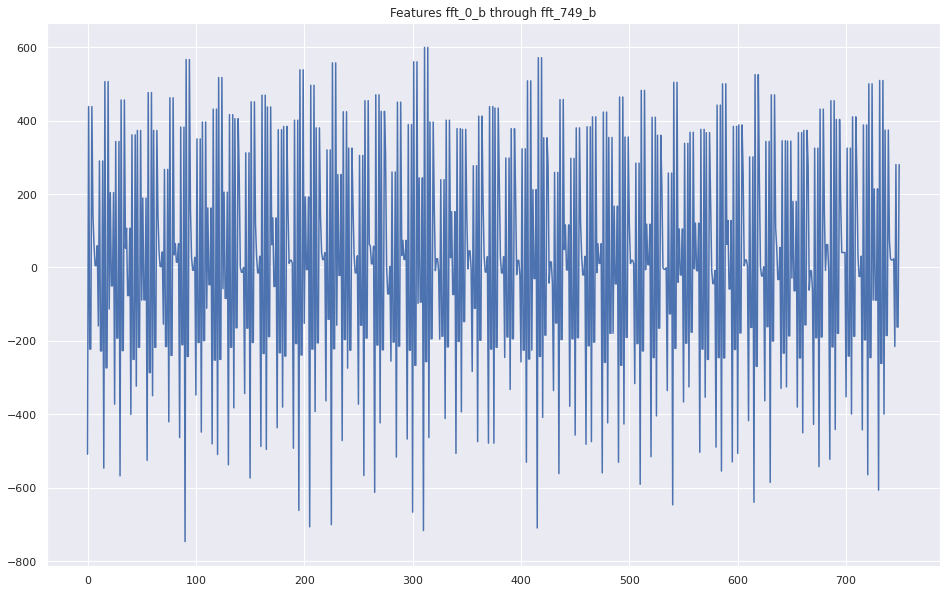

In [7]:
sns.set_theme()
sample = data.loc[0, 'fft_0_b':'fft_749_b']
plt.figure(figsize=(16, 10))
plt.plot(range(len(sample)), sample)
plt.title('Features fft_0_b through fft_749_b')
plt.show()

In [8]:
data['label'].value_counts()

NEUTRAL     716
NEGATIVE    708
POSITIVE    708
Name: label, dtype: int64

In [9]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

data['label'] = le.fit_transform(data['label'])

In [10]:
data['label'].head()

0    0
1    1
2    2
3    2
4    1
Name: label, dtype: int64

In [20]:
from sklearn.model_selection import train_test_split

x = data.drop('label', axis=1)
y = data['label']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123, shuffle=True)

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1705, 2548), (1705,), (427, 2548), (427,))

In [24]:
import tensorflow as tf
import keras

from keras.layers import Input, GRU, Flatten, Dense
from keras.models import Model

In [23]:
inputs = Input(shape=(x_train.shape[1]))

expand_dims = tf.expand_dims(inputs, axis=2)
gru = GRU(256, return_sequences=True)(expand_dims)
flatten = Flatten()(gru)

outputs = Dense(3, activation='softmax')(flatten)

model = Model(inputs=inputs, outputs=outputs)

In [25]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 2548)]            0         
                                                                 
 tf.expand_dims_1 (TFOpLambd  (None, 2548, 1)          0         
 a)                                                              
                                                                 
 gru_1 (GRU)                 (None, 2548, 256)         198912    
                                                                 
 flatten_1 (Flatten)         (None, 652288)            0         
                                                                 
 dense_1 (Dense)             (None, 3)                 1956867   
                                                                 
Total params: 2,155,779
Trainable params: 2,155,779
Non-trainable params: 0
_________________________________________________

In [30]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [31]:
early_stop = [
    tf.keras.callbacks.EarlyStopping(
        patience=5
    ),
    tf.keras.callbacks.ModelCheckpoint(
        filepath='model.h5',
        verbose=1,
        monitor='val_loss',
        save_best_weight=True,
        model='auto'
    )
]

In [32]:
history = model.fit(
    x_train,
    y_train,
    validation_split=0.2,
    batch_size=32,
    epochs=50,
    callbacks=early_stop
)

Epoch 1/50
43/43 [==============================] - ETA: 0s - loss: 33.1437 - accuracy: 0.7735
Epoch 00001: saving model to model.h5
43/43 [==============================] - 120s 3s/step - loss: 33.1437 - accuracy: 0.7735 - val_loss: 10.4334 - val_accuracy: 0.8240
Epoch 2/50
43/43 [==============================] - ETA: 0s - loss: 3.5916 - accuracy: 0.9296
Epoch 00002: saving model to model.h5
43/43 [==============================] - 120s 3s/step - loss: 3.5916 - accuracy: 0.9296 - val_loss: 18.4296 - val_accuracy: 0.8915
Epoch 3/50
43/43 [==============================] - ETA: 0s - loss: 6.0934 - accuracy: 0.9296
Epoch 00003: saving model to model.h5
43/43 [==============================] - 117s 3s/step - loss: 6.0934 - accuracy: 0.9296 - val_loss: 4.5965 - val_accuracy: 0.9208
Epoch 4/50
43/43 [==============================] - ETA: 0s - loss: 2.3424 - accuracy: 0.9582
Epoch 00004: saving model to model.h5
43/43 [==============================] - 115s 3s/step - loss: 2.3424 - accurac

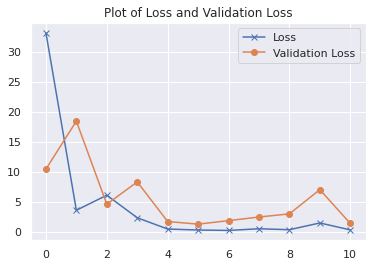

In [67]:
sns.set_theme()
plt.plot(history.history['loss'], '-x',label='Loss')
plt.plot(history.history['val_loss'], '-o',label='Validation Loss')
plt.legend()
plt.title('Plot of Loss and Validation Loss')
plt.show()

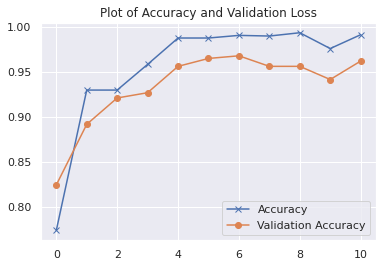

In [66]:
sns.set_theme()
plt.plot(history.history['accuracy'], '-x', label='Accuracy')
plt.plot(history.history['val_accuracy'], '-o', label='Validation Accuracy')
plt.legend()
plt.title('Plot of Accuracy and Validation Loss')
plt.show()

In [35]:
from sklearn.metrics import confusion_matrix, classification_report

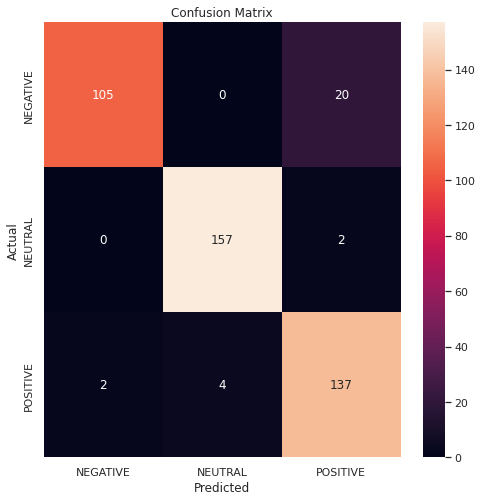

In [41]:
pred = np.array(list(map(lambda x: np.argmax(x), model.predict(x_test))))

sns.set_theme()
cm = confusion_matrix(y_test, pred)

plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, vmin=0, fmt='g', cbar=True)
plt.xticks(np.arange(3) + 0.5, label_mapping.keys())
plt.yticks(np.arange(3) + 0.5, label_mapping.keys())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [39]:
label_mapping = {'NEGATIVE': 0, 'NEUTRAL': 1, 'POSITIVE': 2}
clr = classification_report(y_test, pred, target_names=label_mapping.keys())

print('Classification Report\n')
print(clr)

Classification Report

              precision    recall  f1-score   support

    NEGATIVE       0.98      0.84      0.91       125
     NEUTRAL       0.98      0.99      0.98       159
    POSITIVE       0.86      0.96      0.91       143

    accuracy                           0.93       427
   macro avg       0.94      0.93      0.93       427
weighted avg       0.94      0.93      0.93       427



In [50]:
model.evaluate(x_test, y_test)

14/14 [==============================] - 10s 759ms/step - loss: 4.7991 - accuracy: 0.9344


[4.799092769622803, 0.9344262480735779]